In [21]:
from google.colab import files
uploaded = files.upload()

Saving double_plant_test.png to double_plant_test (2).png


In [22]:
from io import BytesIO
from PIL import Image
import cv2

cv2_image = cv2.imread("double_plant_test.png")
pil_image = Image.open(BytesIO(uploaded['double_plant_test.png']))

<ipython-input-27-1044b49c41d8>:16: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments = slic(cv2_rgb_image, n_segments=250, compactness=10, sigma=1, multichannel = True)


Superpixel 1 :
L: 63.85507283104949
A: 0.8590272019385609
B: 0.10968883177456208
Superpixel 2 :
L: 63.397736307051765
A: 1.462157597442803
B: 15.680471176104065
Superpixel 3 :
L: 55.28063393395926
A: 0.5737786013589806
B: 11.836073904298384
Superpixel 4 :
L: 45.954437339939034
A: -0.5042225575965219
B: 3.8838877535275502
Superpixel 5 :
L: 47.23715596567101
A: 1.0199838921559357
B: 3.0921538076866906
Superpixel 6 :
L: 47.21805657430524
A: 0.41766215908577503
B: 3.025957100498387
Superpixel 7 :
L: 46.10908999679035
A: 0.6611902944941246
B: 3.167413542725116
Superpixel 8 :
L: 44.61246824484865
A: 0.34716429249868225
B: 2.837109432261758
Superpixel 9 :
L: 47.961919070816016
A: 0.29998995216757735
B: 2.7979290413257454
Superpixel 10 :
L: 49.39272063119574
A: 0.9323025666790549
B: 2.450543218026876
Superpixel 11 :
L: 45.77708448786597
A: 0.28876184830396756
B: 2.6397104478035556
Superpixel 12 :
L: 49.183231835611544
A: 1.9087341084402065
B: 2.232509371703498
Superpixel 13 :
L: 47.97748631649

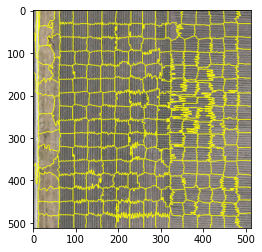

In [27]:
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage.color import lab2rgb
from skimage.color import rgb2lab
import numpy as np
import matplotlib.pyplot as plt
import cv2

cv2_rgb_image = cv2.cvtColor(cv2_image, cv2.COLOR_BGR2RGB)

# Convert image to L*a*b color space
image_lab = rgb2lab(cv2_rgb_image)

# Perform superpixel segmentation using SLIC
segments = slic(cv2_rgb_image, n_segments=250, compactness=10, sigma=1, multichannel = True)

# Initialize empty lists to store L, A, B mean values
L_means = []
A_means = []
B_means = []

# Iterate over all segments
for i in range(segments.max() + 1):
    # Extract L, A, B channels
    L = image_lab[:, :, 0][segments == i]
    A = image_lab[:, :, 1][segments == i]
    B = image_lab[:, :, 2][segments == i]

    # Compute mean L, A, B values
    L_mean = np.mean(L)
    A_mean = np.mean(A)
    B_mean = np.mean(B)

    # Append mean values to lists
    L_means.append(L_mean)
    A_means.append(A_mean)
    B_means.append(B_mean)

# Print mean values for each superpixel
for i in range(len(L_means)):
    print("Superpixel", i + 1, ":")
    print("L:", L_means[i])
    print("A:", A_means[i])
    print("B:", B_means[i])

# Overlay superpixel boundaries on original image
segmented_image = mark_boundaries(pil_image, segments)

# Display segmented image
plt.imshow(segmented_image)
plt.show()
